# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '/Users/Enkay/Documents/Viky/python/self-driving/trafficSigns/traffic-signs-data/train.p'
testing_file = '/Users/Enkay/Documents/Viky/python/self-driving/trafficSigns/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
#loading desired python packages
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from random import randint
from sklearn.utils import shuffle
from tensorflow.contrib.layers import flatten
import math
import tflearn
from PIL import Image
import os
import glob
from sklearn.metrics import confusion_matrix

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [3]:
print ("Shape of training image data {}".format(X_train.shape))
print ("Shape of testing image data {}".format(X_test.shape))
print ("Shape of training label data {}".format(y_train.shape))
print ("Shape of testing label data {}".format(y_test.shape))

Shape of training image data (39209, 32, 32, 3)
Shape of testing image data (12630, 32, 32, 3)
Shape of training label data (39209,)
Shape of testing label data (12630,)


In [4]:
n_train = X_train.shape[0]
n_test = X_test.shape[0]
image_shape = 32
n_classes = len(np.unique(y_train))
print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = 32
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [5]:
data=pd.read_csv('/Users/Enkay/Documents/Viky/python/self-driving/trafficSigns/CarND-Traffic-Sign-Classifier-Project/signnames.csv',
                 names=['classId','SignName'])
sign_names=data['SignName']

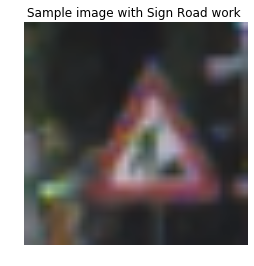

In [6]:
#plotting a test image in the training dataset
i=randint(0,n_train) #selecting a particular example
image=X_train[i]
label=sign_names[y_train[i]+1] # plus one because first row corresponds to column names
plt.imshow(image)
plt.axis('off')
plt.title('Sample image with Sign {} '.format(label))
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

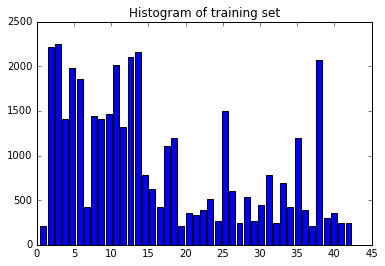

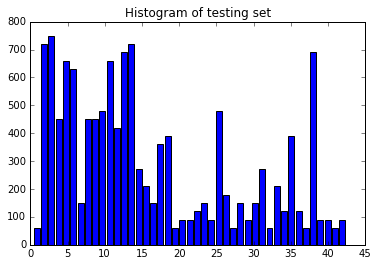

Clearly some classes are under represented


In [103]:
plt.figure()
histo=np.histogram(y_train, bins=43)
bin_edges = histo[1]
bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
plt.title('Histogram of training set')
plt.bar(bin_centers, histo[0])
plt.show()
plt.figure()
histo=np.histogram(y_test, bins=43)
bin_edges = histo[1]
bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
plt.title('Histogram of testing set')
plt.bar(bin_centers, histo[0])
plt.show()
print('Clearly some classes are under represented')

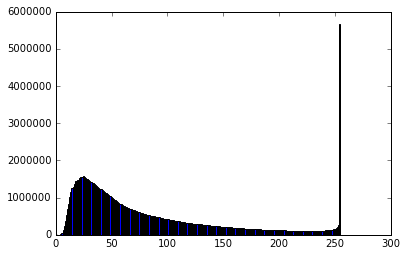

In [7]:
#histogram of input data
plt.hist(X_train.flatten(),255)
plt.show()

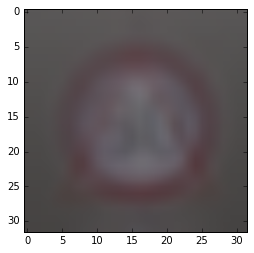

In [8]:
mean_img = np.mean(X_train, axis=0)
plt.imshow(mean_img.astype(np.uint8))

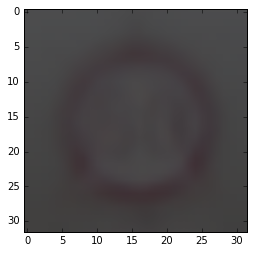

In [9]:
std_img = np.std(X_train, axis=0)
plt.imshow(std_img.astype(np.uint8))

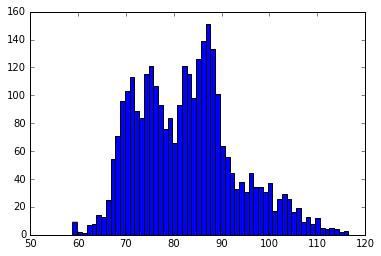

In [10]:
plt.hist(mean_img.flatten(),58)
plt.show()

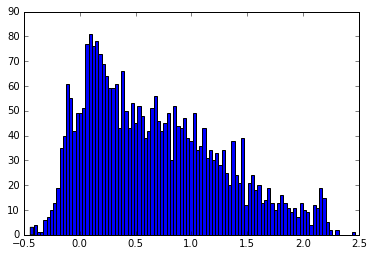

In [11]:
plt.hist(((X_train[0]-mean_img)/std_img).flatten(),100)
plt.show()

In [12]:
#normalising 
X_train=X_train/255.0



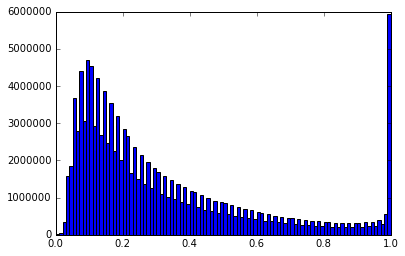

In [13]:
plt.hist(X_train.flatten(),100)
plt.show()

In [14]:
#splitting training data into training and validation sets. testing data already available.
train_proportion=0.7
validation_proportion=0.3
total=X_train.shape[0]
X_test=X_test/255.0 # normalising the test set
#shuffling the training set 
X_train,y_train= shuffle(X_train,y_train)
#training data
X_training=X_train[0: int(train_proportion*total)]
ys_training=y_train[0: int(train_proportion*total)]
#validation data
X_vaildiation=X_train[int(math.ceil(train_proportion*total)):total]
ys_validation=y_train[int(math.ceil(train_proportion*total)):total]

In [15]:
print("Number of training sets = ", X_training.shape[0])
print("Number of validation sets = ", X_vaildiation.shape[0])

Number of training sets =  27446
Number of validation sets =  11762


In [16]:
X_training, ys_training = shuffle(X_training, ys_training)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** Supervised Deep models require minimal or none preprocessing( Ref. Deep learning, Nature paper) . However, I tried the following and restricted with normalisation alone. 
1) Zero mean - This worked quiet well. The image distribution in the training dataset had a nice Gaussian distribution. Nevertheless, with this method, the accuracy on the test set was low. Without this preprocessing, I was able to achieve 100% accuracy on the training set. 
2) Normalisation- The intensity values vary between 0 and 255. Since, I am using ReLU activation function, I found that network performed better after normalisation.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** I split the training dataset to 80% for training and 20% for testing. Since we already around 12000 testing datas, 8000 validation datas are sufficient. 

In [83]:
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 64), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(64))
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 64, 128), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(128))
    fc1_W = tf.Variable(tf.truncated_normal(shape=(3200, 1024), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(1024))
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(1024, 1024), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(1024))
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(1024, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    
    
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    conv1 = tf.nn.relu(conv1)

    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    if training_state:
        conv1=tf.nn.dropout(conv1,keep_prob=0.6,name='dropout1')
    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    #conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 64, 128), mean = mu, stddev = sigma))
    #conv2_b = tf.Variable(tf.zeros(128))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    if training_state:
        conv2=tf.nn.dropout(conv2,keep_prob=0.6,name='dropout2')
    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    #fc1_W = tf.Variable(tf.truncated_normal(shape=(3200, 1024), mean = mu, stddev = sigma))
    #fc1_b = tf.Variable(tf.zeros(1024))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    if training_state:
        fc1=tf.nn.dropout(fc1,keep_prob=0.6,name='dropout3')
    #tf.contrib.layers.apply_regularization(l1_regulariser,fc1_W)
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
      
    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    #fc2_W  = tf.Variable(tf.truncated_normal(shape=(1024, 1024), mean = mu, stddev = sigma))
    #fc2_b  = tf.Variable(tf.zeros(1024))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    #tf.contrib.layers.apply_regularization(l1_regulariser,fc2_W)
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    if training_state:
        fc2=tf.nn.dropout(fc2,keep_prob=0.6,name='dropout4')
    
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    #fc3_W  = tf.Variable(tf.truncated_normal(shape=(1024, 43), mean = mu, stddev = sigma))
    #fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [84]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
training_state=False 


In [85]:
rate = 0.0001
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [86]:
saver = tf.train.Saver()

In [87]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [88]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [89]:
EPOCHS = 10
BATCH_SIZE = 64

In [ ]:
sess=tf.InteractiveSession()

In [91]:
#sess.run(tf.global_variables_initializer())
num_examples = len(X_training)
    
print("Training...")
print()
init = tf.initialize_all_variables()
sess.run(init)
for i in range(EPOCHS):
        #X_training, ys_training = shuffle(X_training, ys_training)
        training_state=True
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_training[offset:end], ys_training[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            #loss=sess.run(loss_operation, feed_dict={x: batch_x, y: batch_y})
            #print ("loss=" , loss )
        training_accuracy = evaluate(X_training, ys_training)
        training_state=False
        validation_accuracy = evaluate(X_vaildiation, ys_validation)
        testing_accuracy = evaluate(X_test, y_test)
        print("EPOCH {} ...".format(i+1))
        print("training Accuracy={:.3f} ".format(training_accuracy))
        print("test Accuracy={:.3f} ".format(testing_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()

Training...

EPOCH 1 ...
training Accuracy=0.834 
test Accuracy=0.720 
Validation Accuracy = 0.813

EPOCH 2 ...
training Accuracy=0.926 
test Accuracy=0.805 
Validation Accuracy = 0.902

EPOCH 3 ...
training Accuracy=0.952 
test Accuracy=0.827 
Validation Accuracy = 0.925

EPOCH 4 ...
training Accuracy=0.960 
test Accuracy=0.826 
Validation Accuracy = 0.933

EPOCH 5 ...
training Accuracy=0.984 
test Accuracy=0.863 
Validation Accuracy = 0.959

EPOCH 6 ...
training Accuracy=0.994 
test Accuracy=0.876 
Validation Accuracy = 0.974

EPOCH 7 ...
training Accuracy=0.988 
test Accuracy=0.862 
Validation Accuracy = 0.963

EPOCH 8 ...
training Accuracy=0.995 
test Accuracy=0.881 
Validation Accuracy = 0.973

EPOCH 9 ...
training Accuracy=0.987 
test Accuracy=0.875 
Validation Accuracy = 0.968

EPOCH 10 ...
training Accuracy=0.999 
test Accuracy=0.896 
Validation Accuracy = 0.983



### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._

**Answer:** For this project, the input is a RGB image and output is classification task containing 43 different classes. Ideal way to solve this problem is to involve few convolutional layes for processing and extracting features in an image and few fully connected layers to perform classification task. I used a fine tuned verison of LeNet for this project.
**Network architecture:**
Layer 1: convolutional layer - 64 feature maps
Layer 2: convolutional layer - 128 feature maps
Layer 3: fully connected layer - 1024 neurons
Layer 4: fully connected layer - 1024 neurons
Layer 5: fully connected layer - 43 neurons corresponding to 43 output classes

Optimiser -- >Adam Optimizer with an initial learning rate of 0.0001
Regulariser -- > Dropout method

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_



**Answer:** Optimiser : Adam
Batch size: 64
epochs : 20
regulariser: dropout 
hyperparameters: Dropout keep_prob, no. of epochs and batch size 

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** The following are the steps I took. 
1) The training and validation accuracy exceeded 98%, but testing error was pretty low (~83%)
2) This case is overfitting. So I applied regularisation methods
3) I implemented dropout layers during training Phase 
4) Testing accuracy boosted to 85% 

I think this architecture suits perfectly fine for this dataset because, the training accuracy is almost 100%. One reason why testing error is relativively low is because not enough data is represented in the training data, because the validation accuracy is pretty high in comparison to testset error 

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [26]:
def process_img(img):
        img=img.resize((32, 32), Image.ANTIALIAS) #resize the image
        img = np.array(img)
        img=img/np.max(img).astype(float) 
        #img=np.reshape(img, [1,32,32,3])
        return img

In [27]:
test_new_images=[img for img in glob.glob("/Users/Enkay/Documents/Viky/python/self-driving/trafficSigns/newData/*jpg")]

In [28]:
Y_predicted_test=sess.run(tf.argmax(logits, 1), feed_dict={x:X_test})
Y_true_test=y_test
idx=Y_predicted_test==Y_true_test
cmp=np.where(idx==False)

In [29]:
testimages=[]
for img_path in (test_new_images):
        im=Image.open(img_path)
        im1=process_img(im)
        testimages.append(im1)

In [32]:
testimages=np.asarray(testimages)

In [33]:
c2=sess.run(logits, feed_dict={x:testimages})

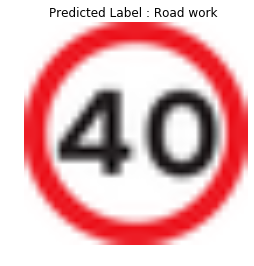

Top 5 probabilities
Road work
Speed limit (50km/h)
Dangerous curve to the right
End of no passing by vehicles over 3.5 metric tons
Slippery road


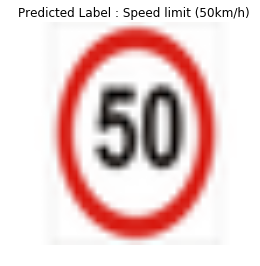

Top 5 probabilities
Speed limit (50km/h)
Right-of-way at the next intersection
Speed limit (80km/h)
Speed limit (20km/h)
Speed limit (60km/h)


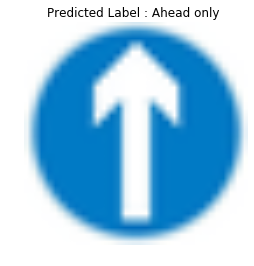

Top 5 probabilities
Ahead only
Priority road
Go straight or right
No passing
Speed limit (120km/h)


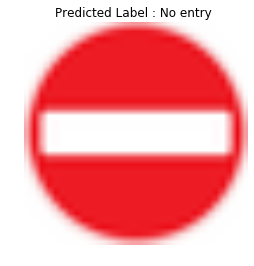

Top 5 probabilities
No entry
Stop
Road work
Speed limit (70km/h)
Dangerous curve to the right


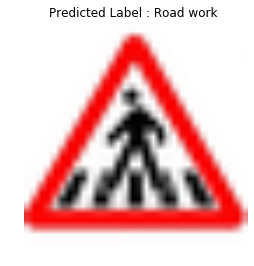

Top 5 probabilities
Road work
General caution
Stop
Speed limit (100km/h)
Speed limit (120km/h)


In [77]:
for i in range(testimages.shape[0]) :
    prediction_label=sign_names[np.argmax(c2[i])+1]
    plt.imshow(testimages[i])
    plt.axis('off')
    plt.title('Predicted Label : {} '.format(prediction_label))
    plt.show()
    print('Top 5 probabilities')
    c5=c2[i].argsort()[-5:][::-1]
    for j in range(5):
        print (sign_names[c5[j]+1])
    

The accuracy on the new test dataset is 60%. 

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._

I've implemented 5 candidate images above
**Answer:** Possibilities of error:
1) Poor lighting conditions 
2) Due to difference in depth perceptions, signs like ahead only, left , right are missclassified by the network
3) Some images are too blurred, hiding the essential features of an image
4) Some classes are underrepresented as can be seen from the histogram  

Few cells below, I have plotted different images from the test set that were wrongly classified

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._

**Answer:** I tested the model on 5 different images from web and obtained 60% ACCURATE. 
My model misclassified pedestrian crossing as Road work. One reason might be because both images involve humans in it. 
The test set accuracy is around 92.1%. Though overfitting is a possibility, the images available in the testset are obtained through various sources which might cause problem.


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:** I've answered in the above cells